<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/10_timeseries_forecasting_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-bb1422a0-6928-e834-730d-6620b9f48eda)


# Get data - bitcoin cost data

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-12 19:27:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-12 19:27:32 (10.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates = ['Date'], index_col=['Date'])


In [6]:
print(data.shape)
data.head()



(2787, 5)


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [7]:
data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [8]:
import matplotlib.pyplot as plt


<Figure size 1200x600 with 0 Axes>

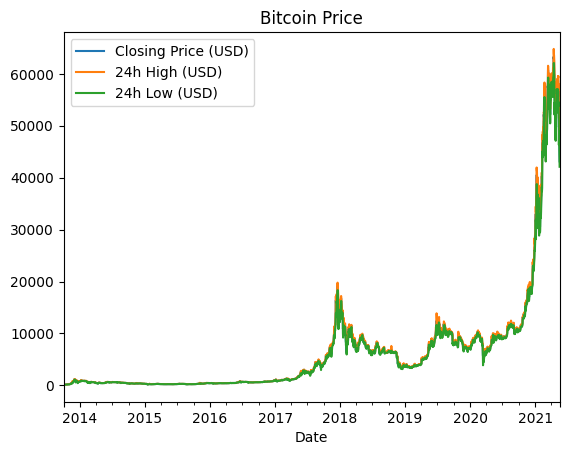

In [9]:
plt.figure(figsize=(12, 6))
data.plot(y=['Closing Price (USD)', '24h High (USD)', '24h Low (USD)'])
plt.title('Bitcoin Price')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [11]:
#import data using csv modules
import csv
from datetime import datetime

In [12]:
#import data using csv modules

timesteps = []
btc_prices = []

with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        timesteps.append(datetime.strptime(row[1], '%Y-%m-%d'))
        btc_prices.append(float(row[2]))

In [13]:
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

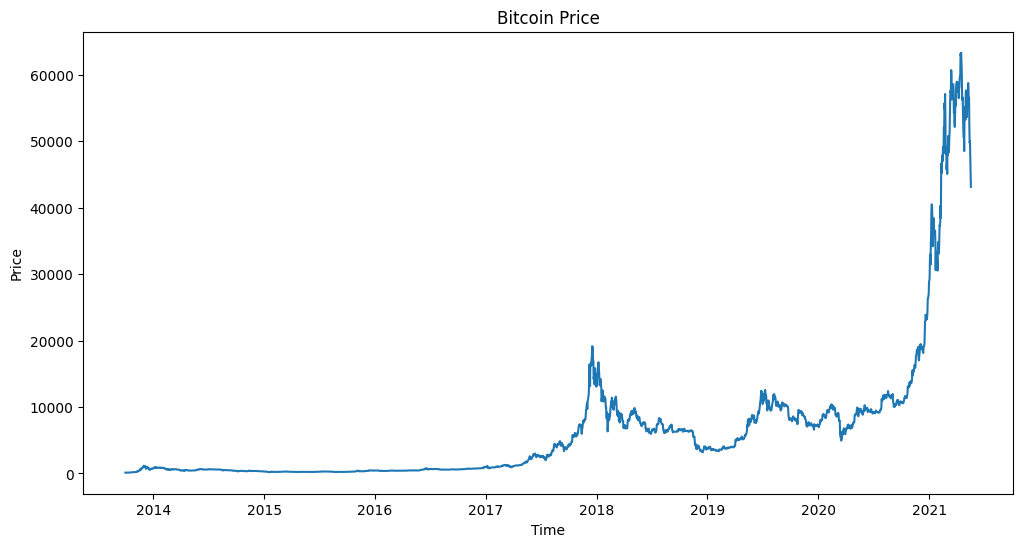

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(timesteps, btc_prices)
plt.title('Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


# Split time series data to train and test data

In [15]:
split_size = int(len(timesteps)*0.8)

x_train = timesteps[:split_size]
y_train = btc_prices[:split_size]

x_test = timesteps[split_size:]
y_test = btc_prices[split_size:]

In [16]:
len(x_train), len(y_train), len(x_test), len(y_test)


(2229, 2229, 558, 558)

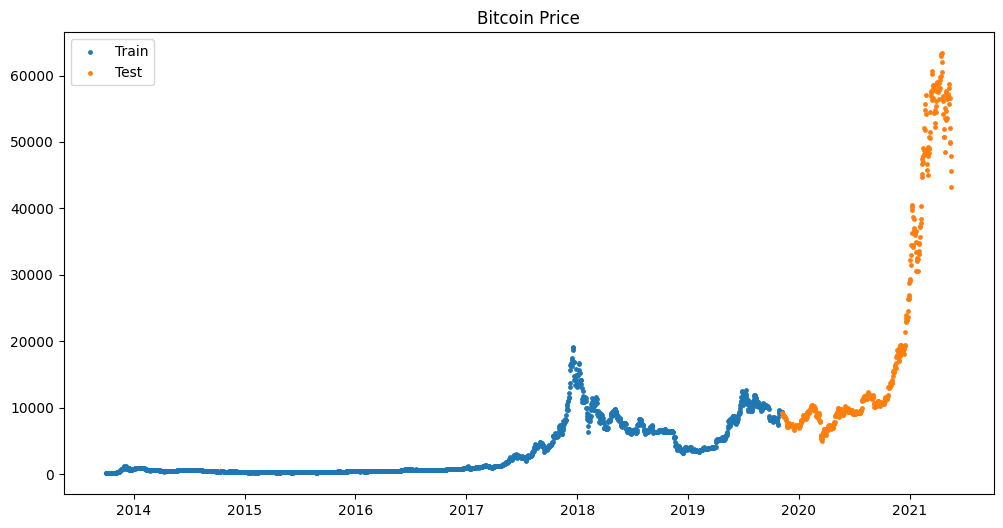

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Train', s=6)
plt.scatter(x_test, y_test, label='Test', s=6)
plt.title('Bitcoin Price')
plt.legend()
plt.show()

In [18]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

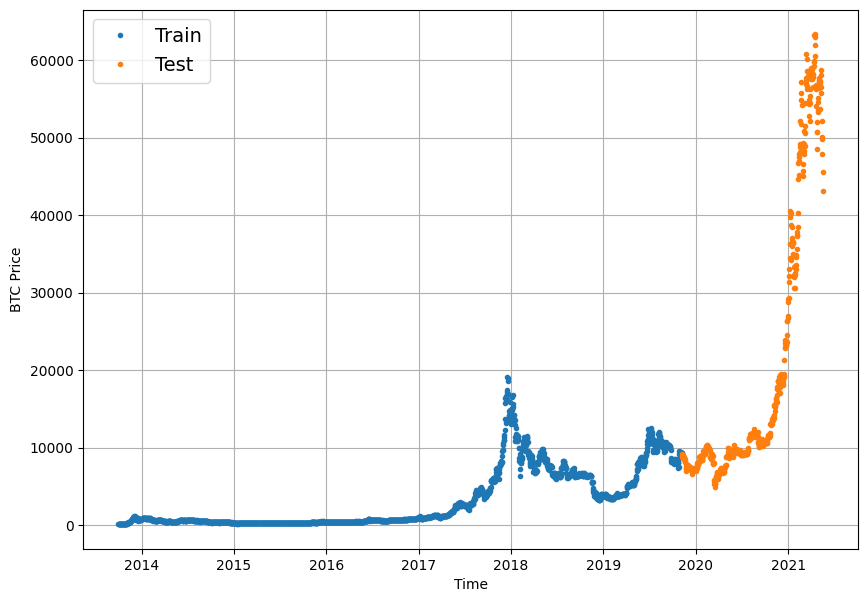

In [19]:
plt.figure(figsize=(10, 7))
plot_time_series(x_train, y_train, label='Train')
plot_time_series(x_test, y_test, label='Test')


# Create a naive model- a base line
$$\hat{y_t}=y_{t-1}$$

In [20]:
test = [1,2,3,4]
tt = np.roll(test, 1)
tt

array([4, 1, 2, 3])

In [21]:
t= test[:-1]
t

[1, 2, 3]

In [22]:
# a native model: the prediction equals to previos step
# horizon = 1
native_forecast = y_test[:-1]

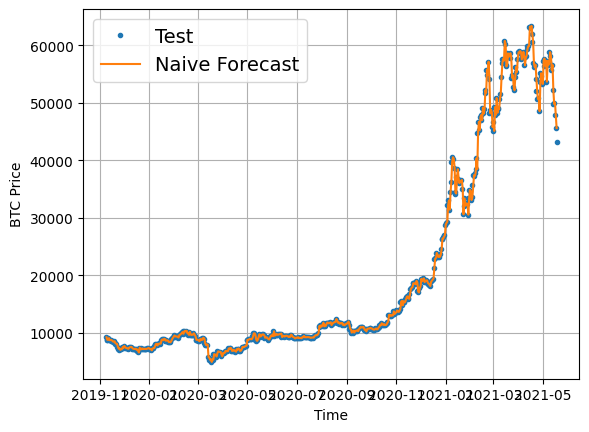

In [23]:
#plot_time_series(x_train, y_train, format='.', label='Train')
plot_time_series(x_test, y_test, format='.', label='Test')
plot_time_series(x_test[1:], native_forecast, format='-', label='Naive Forecast')


# Metrics to evaluate a model

* **MAE** - mean absolute error
* **MSE** - mean squared error
* **RMSE** - root form **MSE**
* **MASE**- mean absolute scaled error
* **Huber**

In [24]:
import tensorflow as tf

tf.__version__

'2.13.0'

In [25]:
# implementation of MASE

def mean_absolute_scaled_error(y_true, y_pred):
  # calculate the mean absolute error
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  # calculate the mean absolute difference between consecutive values
  mad = tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_true[1:], y_true[:-1])))
  # calculate the MASE
  mase = mae/mad
  return mase


In [26]:
len(y_test[:-1]), len(native_forecast)

(557, 557)

In [27]:
print(f' Mean absolute scaled error = {mean_absolute_scaled_error(y_test[1:], native_forecast)}')

 Mean absolute scaled error = 0.9995700120925903


In [28]:
# implementation all metrics
def evaluate_preds(y_true, y_pred):
  # calculate the mean absolute error
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  # calculate the mean absolute difference between consecutive values
  mad = tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_true[1:], y_true[:-1])))
  # calculate the MAPE
  mape = 100*tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_pred,y_true)/y_true)) #tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # calculate the MASE
  mase = mae/mad

  metrics = dict()
  metrics['mae'] = mae.numpy()
  metrics['mse'] = mse.numpy()
  metrics['rmse'] = rmse.numpy()
  metrics['mape'] = mape.numpy()
  metrics['mase'] = mase.numpy()
  return metrics

In [29]:
naive_result = evaluate_preds(y_test[1:], native_forecast)

In [30]:
np.min(y_test), np.max(y_test), np.mean(y_test)


(4944.7023359837, 63346.7890351052, 20056.632963737222)

In [31]:
100*(567.9802/20056.632963737222)

2.831882106168663

# Windowing our dataset

In [32]:
# create a function windowed data

def get_labelled_windows(x, horizon=1):
  return x[:,:-horizon],x[:,-horizon:]

In [33]:
t = np.array([[1,2,3,4,5,6,7,8]])
get_labelled_windows(t,4)

(array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]))

In [34]:
# Create function to view NumPy arrays as windows

def make_windows(x, window_size=7, horizon=1):
  x = np.asarray(x)
  # create a window step array
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step+ np.expand_dims(np.arange(len(x)-window_size-horizon+1), axis=0).T

  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon)
  return windows, labels

In [35]:
def make_windows_using_loop(x, window_size=7, horizon=1):
  x = np.asarray(x)
  # create a window step array
  windows = []
  lebels = []
  for i in range(len(x)-window_size-horizon+1):
    windows.append(x[i:i+window_size])
    lebels.append(x[i+window_size:i+window_size+horizon])
  return np.array(windows), np.array(lebels)

In [36]:
import time

t = np.array(range(1,100000))
st = time.time()
x, y = make_windows_using_loop(t, 3, 2)
print(f'Execution time1 = {time.time()- st}')

st = time.time()
x, y = make_windows(t, 3, 2)

print(f'Execution time2= {time.time()- st}')

Execution time1 = 0.3909902572631836
Execution time2= 0.00747370719909668


In [37]:
x.shape, y.shape

((99995, 3), (99995, 2))

In [38]:
tt = np.array(range(0,10))
indexes = [[0,1,2],[1,2,3]]

a = tt[indexes]
print(a.shape)
print(a)


(2, 3)
[[0 1 2]
 [1 2 3]]


In [39]:
tt[[[0,1],[4,5],[6,7]]]

array([[0, 1],
       [4, 5],
       [6, 7]])

#Create a model_1  window = 7, horizon = 1

In [40]:
window_size = 7
horizon = 1

In [41]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [42]:
x_data, y_data = make_windows(data['Closing Price (USD)'], window_size, horizon)


In [43]:
x_data.shape, y_data.shape

((2780, 7), (2780, 1))

In [44]:
print(x_data[3], y_data[3])
print(x_data[4], y_data[4])


[118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] [125.27966]
[121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] [125.9275]


## Split data to train and test

In [45]:
def split_data(x, y, test_size=0.2):
  train_size = int(len(x)*(1-test_size))
  x_train = x[:train_size]
  x_test = x[train_size:]
  y_train = y[:train_size]
  y_test = y[train_size:]
  return x_train, x_test, y_train, y_test


In [46]:
x_train, x_test, y_train, y_test = split_data(x_data, y_data)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2224, 7), (556, 7), (2224, 1), (556, 1))

In [48]:
x_data.shape

(2780, 7)

## Create a Checkpoint callback

In [49]:
# create checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def create_ckpoint(filename):
  return ModelCheckpoint(filename, save_best_only=True, verbose=0)

def create_early_stopping(patience=3):
  return EarlyStopping(monitor='val_loss',restore_best_weights=True,  patience=patience)

In [50]:
def make_preds(model, data):
  pred = model.predict(data)
  return np.squeeze(pred)

In [51]:
# create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(window_size, horizon):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(window_size,)))
  model.add(Dense(horizon, activation='linear'))
  model.compile(optimizer='adam', loss='mae')
  return model

In [52]:
model1 = create_model(window_size, horizon)

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
MCP1 = create_ckpoint('model1.h5')
ES_CB = create_early_stopping()

model1.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[MCP1],
    verbose=1)


Epoch 1/100
18/18 [==============================] - 7s 13ms/step - loss: 2413.5583 - val_loss: 2760.8274
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 343.7007 - val_loss: 1493.1754
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 198.7660 - val_loss: 959.6999


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 160.6816 - val_loss: 995.2822
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 155.5669 - val_loss: 824.1614
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 151.6795 - val_loss: 811.5062
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 146.7934 - val_loss: 810.6303
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 141.7154 - val_loss: 791.5273
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 139.2893 - val_loss: 792.2001
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 136.2450 - val_loss: 761.6838
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1926 - val_loss: 835.6349
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 136.4503 - val_loss: 745.1637
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - lo

In [54]:
# load the best model

# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model('model1.h5')
model_1.evaluate(x_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 563.1127


563.1126708984375

In [55]:
model1.evaluate(x_test, y_test)


18/18 [==============================] - 0s 3ms/step - loss: 571.2205


571.220458984375

In [56]:
y_test.dtype, y_test.shape


(dtype('float64'), (556, 1))

In [57]:
y_test_ev = tf.squeeze(np.array(y_test, dtype=np.float32))
y_pred = make_preds(model_1, x_test)

model1_result = evaluate_preds(y_test_ev, y_pred)
model1_result

18/18 [==============================] - 0s 2ms/step


{'mae': 563.1126,
 'mse': 1156548.5,
 'rmse': 1075.4294,
 'mape': 2.5222232,
 'mase': 0.9892329}

In [58]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [59]:
timesteps = np.array(timesteps)
test_timesteps = timesteps[-len(y_test):]


In [60]:
test_timesteps.shape

(556,)

In [61]:
y_test_ev.shape

TensorShape([556])

In [62]:
y_test_ev.shape, y_pred.shape,test_timesteps.shape

(TensorShape([556]), (556,), (556,))

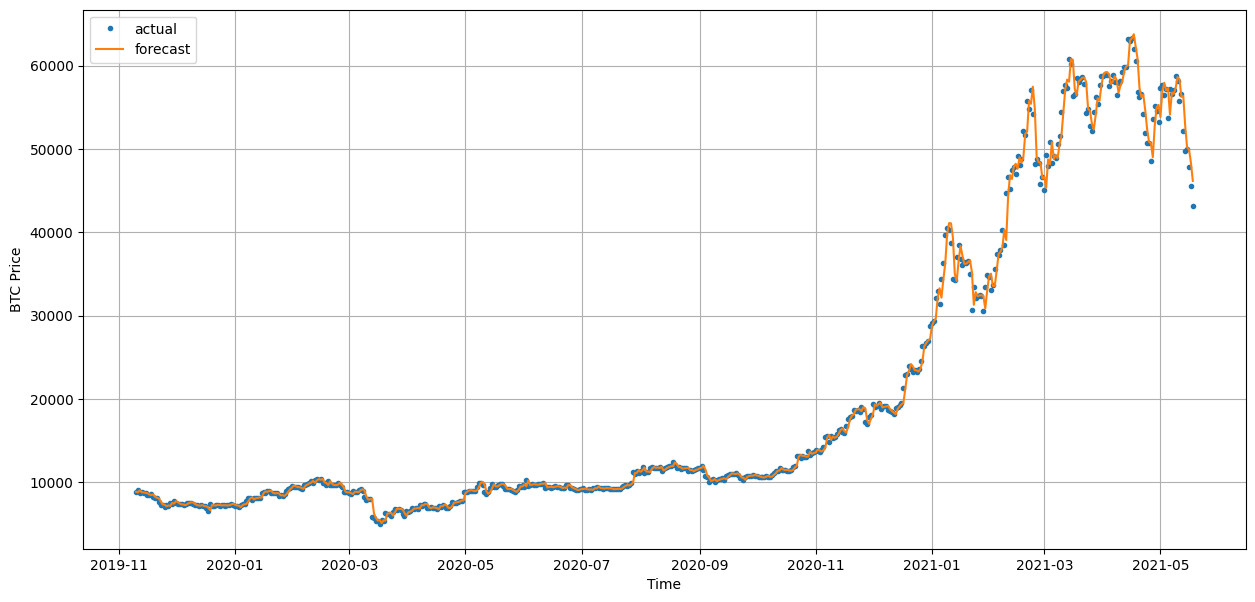

In [63]:
#plot the forecast

plt.figure(figsize=(15, 7))
plot_time_series(test_timesteps, y_test_ev, format='.', start=0, end=None, label='actual')
plot_time_series(test_timesteps, y_pred, format='-', start=0, end=None, label='forecast')
plt.legend()
plt.show()


# Create a model_2 using window = 30, horizon = 1

In [64]:
window_size2 = 30
horizon2 = 1

In [65]:
x_data2, y_data2 = make_windows(data['Closing Price (USD)'], window_size2, horizon2)

In [66]:
x_data2.shape, y_data2.shape


((2757, 30), (2757, 1))

In [67]:
x_data.shape, y_data.shape

((2780, 7), (2780, 1))

In [68]:
data['Closing Price (USD)'].shape

(2787,)

In [69]:
model2 = create_model(window_size2, horizon2)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
x_train2, x_test2, y_train2, y_test2 = split_data(x_data2, y_data2, test_size=0.2)

In [71]:
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape


((2205, 30), (552, 30), (2205, 1), (552, 1))

In [72]:
MCP2 = create_ckpoint('model2.h5')

model2.fit(
    x_train2,
    y_train2,
    epochs=100,
    validation_data=(x_test2, y_test2),
    batch_size=128,
    callbacks=[MCP2])


Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 370.2609 - val_loss: 1309.8615
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 196.7462 - val_loss: 1114.4526
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 189.5127 - val_loss: 1045.2087
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 193.5994 - val_loss: 988.3458
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 168.9232 - val_loss: 1183.1290
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 196.1999 - val_loss: 1263.4822
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 180.6189 - val_loss: 1098.4865
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 164.8707 - val_loss: 1032.0060
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4564 - val_loss: 1037.0531
Epoch 10/100
18/18 [==============================] - 0s 5ms/ste

In [73]:
model2.evaluate(x_test2, y_test2)

18/18 [==============================] - 0s 3ms/step - loss: 617.8209


617.8208618164062

In [74]:
model2 = tf.keras.models.load_model('model2.h5')
model2.evaluate(x_test2, y_test2)

18/18 [==============================] - 0s 3ms/step - loss: 603.2813


603.2813110351562

In [75]:
y_pred2 = make_preds(model2, x_test2)


18/18 [==============================] - 0s 2ms/step


In [76]:
y_pred2.shape

(552,)

In [77]:
y_test2_ev = tf.squeeze(np.array(y_test2, dtype=np.float32))

model2_result = evaluate_preds(y_test2_ev, y_pred2)
model2_result

{'mae': 603.2814,
 'mse': 1218048.2,
 'rmse': 1103.6522,
 'mape': 2.7781498,
 'mase': 1.0545418}

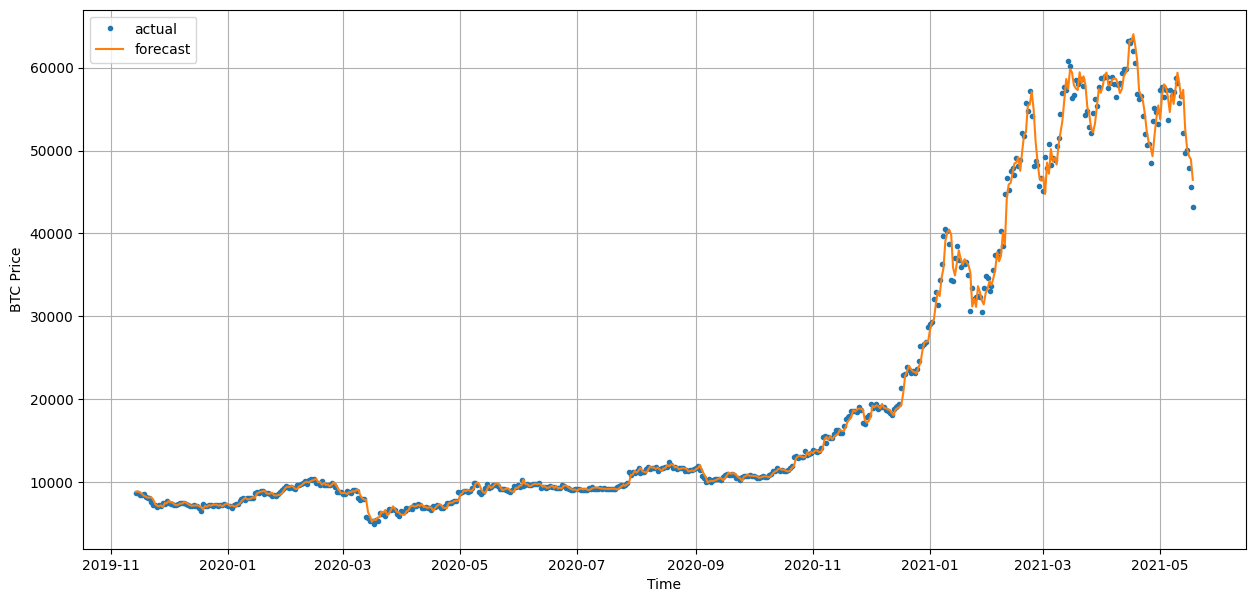

In [78]:
test_timesteps2 = timesteps[-len(y_test2):]

plt.figure(figsize=(15,7))
plot_time_series(test_timesteps2, y_test2_ev, format='.', start=0, end=None, label='actual')
plot_time_series(test_timesteps2, y_pred2, format='-', start=0, end=None, label='forecast')
plt.legend()
plt.show()


# Create model_3 using window = 30, horizon = 7

In [79]:
window_size3 = 30
horizon3 = 7

In [80]:
x_data3, y_data3 = make_windows(data['Closing Price (USD)'], window_size3, horizon3)

In [81]:
x_data3.shape, y_data3.shape


((2751, 30), (2751, 7))

In [82]:
x_train3, x_test3, y_train3, y_test3 = split_data(x_data3, y_data3, test_size=0.2)


In [83]:
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [84]:
model3 = create_model(window_size3, horizon3)

model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4871 (19.03 KB)
Trainable params: 4871 (19.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
MCP3 = create_ckpoint('model3.h5')

model3.fit(
    x_train3,
    y_train3,
    epochs=100,
    validation_data=(x_test3, y_test3),
    callbacks=[MCP3])


Epoch 1/100
69/69 [==============================] - 1s 5ms/step - loss: 571.8560 - val_loss: 1802.1494
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 342.1111 - val_loss: 1662.4083
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: 307.7766 - val_loss: 1800.2413
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 296.5641 - val_loss: 1541.9703
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 292.8396 - val_loss: 1650.8098
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 277.5121 - val_loss: 1483.1704
Epoch 7/100
69/69 [==============================] - 0s 4ms/step - loss: 276.7990 - val_loss: 1522.5068
Epoch 8/100
69/69 [==============================] - 0s 3ms/step - loss: 267.4372 - val_loss: 1424.8171
Epoch 9/100
69/69 [==============================] - 0s 3ms/step - loss: 263.9200 - val_loss: 1505.5426
Epoch 10/100
69/69 [==============================] - 0s 4ms/ste

In [86]:
model3.evaluate(x_test3, y_test3)


18/18 [==============================] - 0s 2ms/step - loss: 1244.5732


1244.5732421875

In [87]:
# load the best model
model3= tf.keras.models.load_model('model3.h5')
model3.evaluate(x_test3, y_test3)


18/18 [==============================] - 0s 2ms/step - loss: 1213.0073


1213.00732421875

In [88]:
# calculate metrics
y_pred3 = make_preds(model3, x_test3)

y_pred3.shape

18/18 [==============================] - 0s 1ms/step


(551, 7)

In [89]:
y_test3.shape

(551, 7)

In [90]:
y_test3 = tf.cast(y_test3, dtype=tf.float32)
y_test3.shape


TensorShape([551, 7])

In [91]:
model3_result = evaluate_preds(y_test3, y_pred3)

In [92]:
model3_result['mae'].shape, model3_result['mse'].shape


((551,), (551,))

In [93]:
for key in model3_result.keys():
    model3_result[key] = np.mean(model3_result[key])

model3_result

{'mae': 1213.0074,
 'mse': 5294818.5,
 'rmse': 1404.6654,
 'mape': 5.551482,
 'mase': 2.158479}

In [94]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [95]:
y_test3.shape

TensorShape([551, 7])

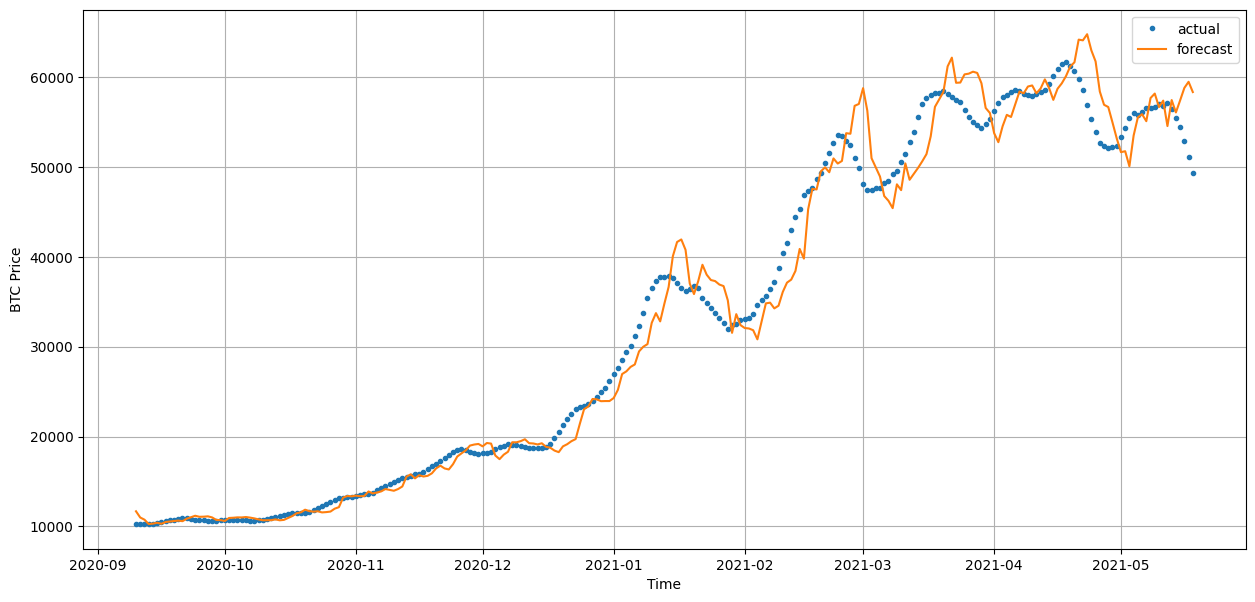

In [96]:
test_timesteps3 = timesteps[-len(y_test3):]

plt.figure(figsize=(15,7))
plot_time_series(test_timesteps3, tf.reduce_mean(y_test3, axis = 1), format='.', start=300, end=None, label='actual')
plot_time_series(test_timesteps3, tf.reduce_mean(y_pred3, axis = 1), format='-', start=300, end=None, label='forecast')
plt.legend()
plt.show()

# Compare performing models

In [97]:
all_results = pd.DataFrame([naive_result, model1_result, model2_result, model3_result], index=['naive', 'model1', 'model2', 'model3'])


In [98]:
all_results

,mae,mse,rmse,mape,mase
naive,567.980225,1147547.00,1071.236206,2.516525,0.999570
model1,563.112610,1156548.50,1075.429443,2.522223,0.989233
model2,603.281372,1218048.25,1103.652222,2.778150,1.054542
model3,1213.007446,5294818.50,1404.665405,5.551482,2.158479


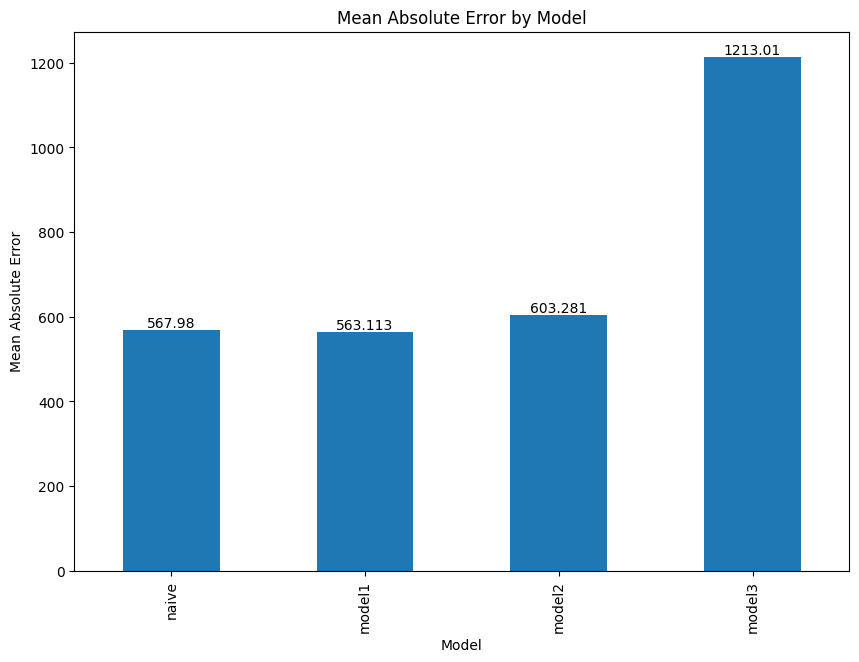

In [99]:
plt.figure(figsize=(10,7))
ax = all_results['mae'].plot.bar()
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Model')
ax.set_title('Mean Absolute Error by Model')
ax.bar_label(ax.containers[0])
plt.show()


In [100]:
all_results.mae

naive      567.980225
model1     563.112610
model2     603.281372
model3    1213.007446
Name: mae, dtype: float32

# Create model_4 CNN1

In [101]:
# Create a model
window_size4 = 7
horizon4 = 1

In [102]:
x_data4, y_data4 = make_windows(data['Closing Price (USD)'], window_size4, horizon4)


In [103]:
x_data4.shape, y_data4.shape

((2780, 7), (2780, 1))

In [104]:
x_train4, x_test4, y_train4, y_test4 = split_data(x_data4, y_data4, test_size=0.2)

In [105]:
x_train4.shape, x_test4.shape, y_train4.shape, y_test4.shape


((2224, 7), (556, 7), (2224, 1), (556, 1))

In [106]:
t = tf.constant(x_train4[0])
t

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [107]:
# add extra demantion to input

expand_dim_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

t_exp = expand_dim_layer(t)
t_exp

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [108]:
def create_CNN1_model(window_size4, horizon4):

  inputs = tf.keras.Input(shape=(window_size4, ))
  print(inputs.shape)
  x = tf.keras.layers.Lambda(lambda d: tf.expand_dims(d, axis=2))(inputs)
  print(x.shape)
  x = tf.keras.layers.Conv1D(
      input_shape =(window_size4, 1),
      filters=128,
      kernel_size=5,
      strides=1,
      padding='causal',
      activation='relu')(x)
  print(x.shape)
  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu')(x)
  print(x.shape)

  x = tf.keras.layers.GlobalMaxPooling1D()(x)
  print(x.shape)
  outputs = tf.keras.layers.Dense(horizon4, activation='linear')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model

In [109]:
model4 = create_CNN1_model(window_size4, horizon4)
model4.summary()

(None, 7)
(None, 7, 1)
(None, 7, 128)
(None, 7, 64)
(None, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d (Conv1D)             (None, 7, 128)            768       
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             24640     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_6 (Dense)             (None, 1)                 65       

In [110]:
MCP4 = ModelCheckpoint('best_model4.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

model4.fit(x_train4, y_train4, epochs=100, verbose=1, batch_size=128, validation_data=(x_test4, y_test4), callbacks=[MCP4])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 922.7943 - mae: 922.7943  
Epoch 1: val_mae improved from inf to 2187.37891, saving model to best_model4.h5
18/18 [==============================] - 7s 36ms/step - loss: 922.7943 - mae: 922.7943 - val_loss: 2187.3789 - val_mae: 2187.3789
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 291.3293 - mae: 291.3293
Epoch 2: val_mae improved from 2187.37891 to 1774.82971, saving model to best_model4.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 0s 10ms/step - loss: 277.9321 - mae: 277.9321 - val_loss: 1774.8297 - val_mae: 1774.8297
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 251.7774 - mae: 251.7774
Epoch 3: val_mae improved from 1774.82971 to 1250.62927, saving model to best_model4.h5
18/18 [==============================] - 0s 10ms/step - loss: 235.9626 - mae: 235.9626 - val_loss: 1250.6293 - val_mae: 1250.6293
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 220.5567 - mae: 220.5567
Epoch 4: val_mae improved from 1250.62927 to 1163.25708, saving model to best_model4.h5
18/18 [==============================] - 0s 10ms/step - loss: 212.4721 - mae: 212.4721 - val_loss: 1163.2571 - val_mae: 1163.2571
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 209.4332 - mae: 209.4332
Epoch 5: val_mae did not improve from 1163.25708
18/18 [==============================] - 0s 7ms/step - loss: 207.2740 - mae: 207.2740 - val_loss: 1293.

In [111]:
model4.evaluate(x_test4, y_test4)


18/18 [==============================] - 0s 6ms/step - loss: 590.6997 - mae: 590.6997


[590.69970703125, 590.69970703125]

In [112]:
model4 = tf.keras.models.load_model('best_model4.h5')
model4.evaluate(x_test4, y_test4)


18/18 [==============================] - 0s 2ms/step - loss: 572.8907 - mae: 572.8907


[572.8907470703125, 572.8907470703125]

In [113]:
y_pred4 = model4.predict(x_test4)
y_pred4.shape


18/18 [==============================] - 0s 2ms/step


(556, 1)

In [114]:
y_pred4 = tf.squeeze(y_pred4)
y_pred4.shape



TensorShape([556])

In [115]:
y_test4 = tf.cast(y_test4, dtype=tf.float32)
y_test4.shape

TensorShape([556, 1])

In [116]:
model4_results = evaluate_preds(tf.squeeze(y_test4), y_pred4)
model4_results

{'mae': 572.8908,
 'mse': 1172180.8,
 'rmse': 1082.673,
 'mape': 2.6317694,
 'mase': 1.0064105}

In [117]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Create LSTM model

In [118]:
def create_LSTM_model(window_size4, horizon4):
  inputs = tf.keras.Input(shape=(window_size4, ))
  print(inputs.shape)
  x = tf.keras.layers.Lambda(lambda d: tf.expand_dims(d, axis=2))(inputs)
  print(x.shape)
  x = tf.keras.layers.LSTM(64, return_sequences=False)(x)
  print(x.shape)
  outputs = tf.keras.layers.Dense(horizon4, activation='linear')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model


In [119]:
model5 = create_LSTM_model(window_size4, horizon4)
model5.summary()

(None, 7)
(None, 7, 1)
(None, 64)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 7, 1)              0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
MCP5 = ModelCheckpoint('best_model5.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

model5.fit(x_train4, y_train4, epochs=100, verbose=1, batch_size=128, validation_data=(x_test4, y_test4), callbacks=[MCP5])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 3140.5835 - mae: 3140.5835 
Epoch 1: val_mae improved from inf to 20095.92969, saving model to best_model5.h5
18/18 [==============================] - 4s 32ms/step - loss: 3158.2529 - mae: 3158.2529 - val_loss: 20095.9297 - val_mae: 20095.9297
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 3146.8411 - mae: 3146.8411
Epoch 2: val_mae improved from 20095.92969 to 20095.04297, saving model to best_model5.h5
18/18 [==============================] - 0s 8ms/step - loss: 3157.4597 - mae: 3157.4597 - val_loss: 20095.0430 - val_mae: 20095.0430
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 3165.3342 - mae: 3165.3342
Epoch 3: val_mae improved from 20095.04297 to 20094.15625, saving model to best_model5.h5
18/18 [==============================] - 0s 8ms/step - loss: 3156.6145 - mae: 3156.6145 - val_loss: 20094.1562 - val_mae: 20094.1562
Epoch 4/100
14/18 [======================>.......

In [121]:
model5.evaluate(x_test4, y_test4)

18/18 [==============================] - 0s 3ms/step - loss: 20024.4609 - mae: 20024.4609


[20024.4609375, 20024.4609375]

In [122]:
all_results = pd.DataFrame([naive_result, model1_result, model2_result, model3_result,model4_results], index=['naive', 'model1', 'model2', 'model3', 'model4'])
all_results


,mae,mse,rmse,mape,mase
naive,567.980225,1147547.00,1071.236206,2.516525,0.999570
model1,563.112610,1156548.50,1075.429443,2.522223,0.989233
model2,603.281372,1218048.25,1103.652222,2.778150,1.054542
model3,1213.007446,5294818.50,1404.665405,5.551482,2.158479
model4,572.890808,1172180.75,1082.672974,2.631769,1.006410


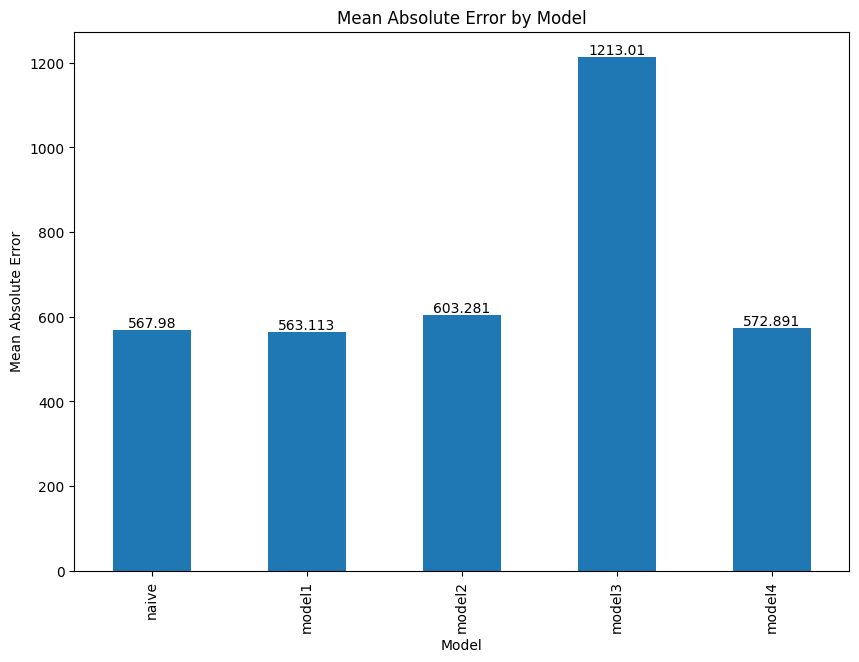

In [123]:
plt.figure(figsize=(10,7))
ax = all_results['mae'].plot.bar()
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Model')
ax.set_title('Mean Absolute Error by Model')
ax.bar_label(ax.containers[0])
plt.show()

#N-BEATS

## BLOCK Input

In [124]:
# implement the block input
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        # hyperparameters
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        # create an empty list
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # reshape theta to the right size
        backward = theta[:, :self.input_size]
        forward = theta[:, -self.horizon:]
        return backward, forward



In [125]:
WINDOW_SIZE = 7
HORIZON = 1
tf.random.set_seed(42)

# test the block
test_nbeats_block = NBeatsBlock(
    input_size=WINDOW_SIZE,
    theta_size=WINDOW_SIZE+HORIZON,
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4,
)

In [126]:
#create a dummy imputs

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [127]:
np.arange(3), tf.range(3)

(array([0, 1, 2]),
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2], dtype=int32)>)

In [128]:
backward, forecast = test_nbeats_block(dummy_inputs)
backward.numpy(), forecast.numpy()

(array([[-0.11112748, -0.1474788 , -0.08578072, -0.1887811 ,  0.16121721,
          0.0709998 , -0.2727673 ]], dtype=float32),
 array([[0.34775412]], dtype=float32))

### Create pipeline

In [129]:
WINDOW_SIZE = 7
HORIZON = 1 # univariante time series

In [130]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [131]:
bitcoin_prices = data["Closing Price (USD)"]
bitcoin_prices.head()


Date
2013-10-01    123.65499
2013-10-02    125.45500
2013-10-03    108.58483
2013-10-04    118.67466
2013-10-05    121.33866
Name: Closing Price (USD), dtype: float64

In [132]:
def split_time_series(data, split_portion=0.8):
  split_size = int(len(data) * split_portion)
  train = data[:split_size]
  test = data[split_size:]
  return train, test


In [133]:
train, test = split_time_series(bitcoin_prices)


In [134]:
def windowed_dataset(data, window_size=WINDOW_SIZE, horizon=HORIZON, batch_size = 32, shuffle = False, shuffle_buffer=None):
  w_data = tf.data.Dataset.from_tensor_slices(data)
  w_data = w_data.window(window_size + horizon, shift=1, drop_remainder=True)
  w_data = w_data.flat_map(lambda window: window.batch(window_size + horizon))
  w_data = w_data.map(lambda w : (w[:window_size], w[-horizon:]))

  if shuffle:
    w_data = w_data.shuffle(shuffle_buffer)
  w_data = w_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

  return w_data

In [135]:
train_ds = windowed_dataset(train, window_size=WINDOW_SIZE, horizon=HORIZON, batch_size=1024, shuffle=True, shuffle_buffer=1000)
test_ds = windowed_dataset(test, batch_size = 1024)

In [136]:
train_ds


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))>

In [137]:
for x, y in train_ds.take(1):
  print(x.shape, y.shape)
  print(x[0])
  print(y[0])


(1024, 7) (1024, 1)
tf.Tensor([512.30833 533.92999 579.59333 581.51    572.44833 562.4     571.845  ], shape=(7,), dtype=float64)
tf.Tensor([612.12666], shape=(1,), dtype=float64)


In [138]:
# hiperparameters

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON


In [139]:
## prepare to residual layers
t1 = tf.range(10) +10
t2 = tf.range(10)

sub_t = tf.keras.layers.subtract([t1, t2])
add_t = tf.keras.layers.add([t1, t2])

sub_t, add_t

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [140]:
tf.subtract(t1, t2), tf.add(t1, t2)


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm
Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:


1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

Let's do it!

In [141]:
from pandas.core import resample
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(INPUT_SIZE,))

nbeatblock = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name="initial_nbeats"
)
backcast, forecast = nbeatblock(inputs)
residuals = tf.keras.layers.subtract([inputs, backcast])

for i in range(N_STACKS-1):
  nbeatblock = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"nbeats_{i+1}")

  block_backcast, block_forecast = nbeatblock(residuals)

  residuals = tf.keras.layers.Subtract()([residuals, block_backcast])
  forecast = tf.keras.layers.Add()([forecast, block_forecast])


resnet_model = tf.keras.Model(inputs=inputs, outputs=forecast)

resnet_model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(0.001))

In [142]:
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 initial_nbeats (NBeatsBloc  ((None, 7),                  796168    ['input_3[0][0]']             
 k)                           (None, 1))                                                          
                                                                                                  
 subtract_1 (Subtract)       (None, 7)                    0         ['input_3[0][0]',             
                                                                     'initial_nbeats[0][0]']      
                                                                                            

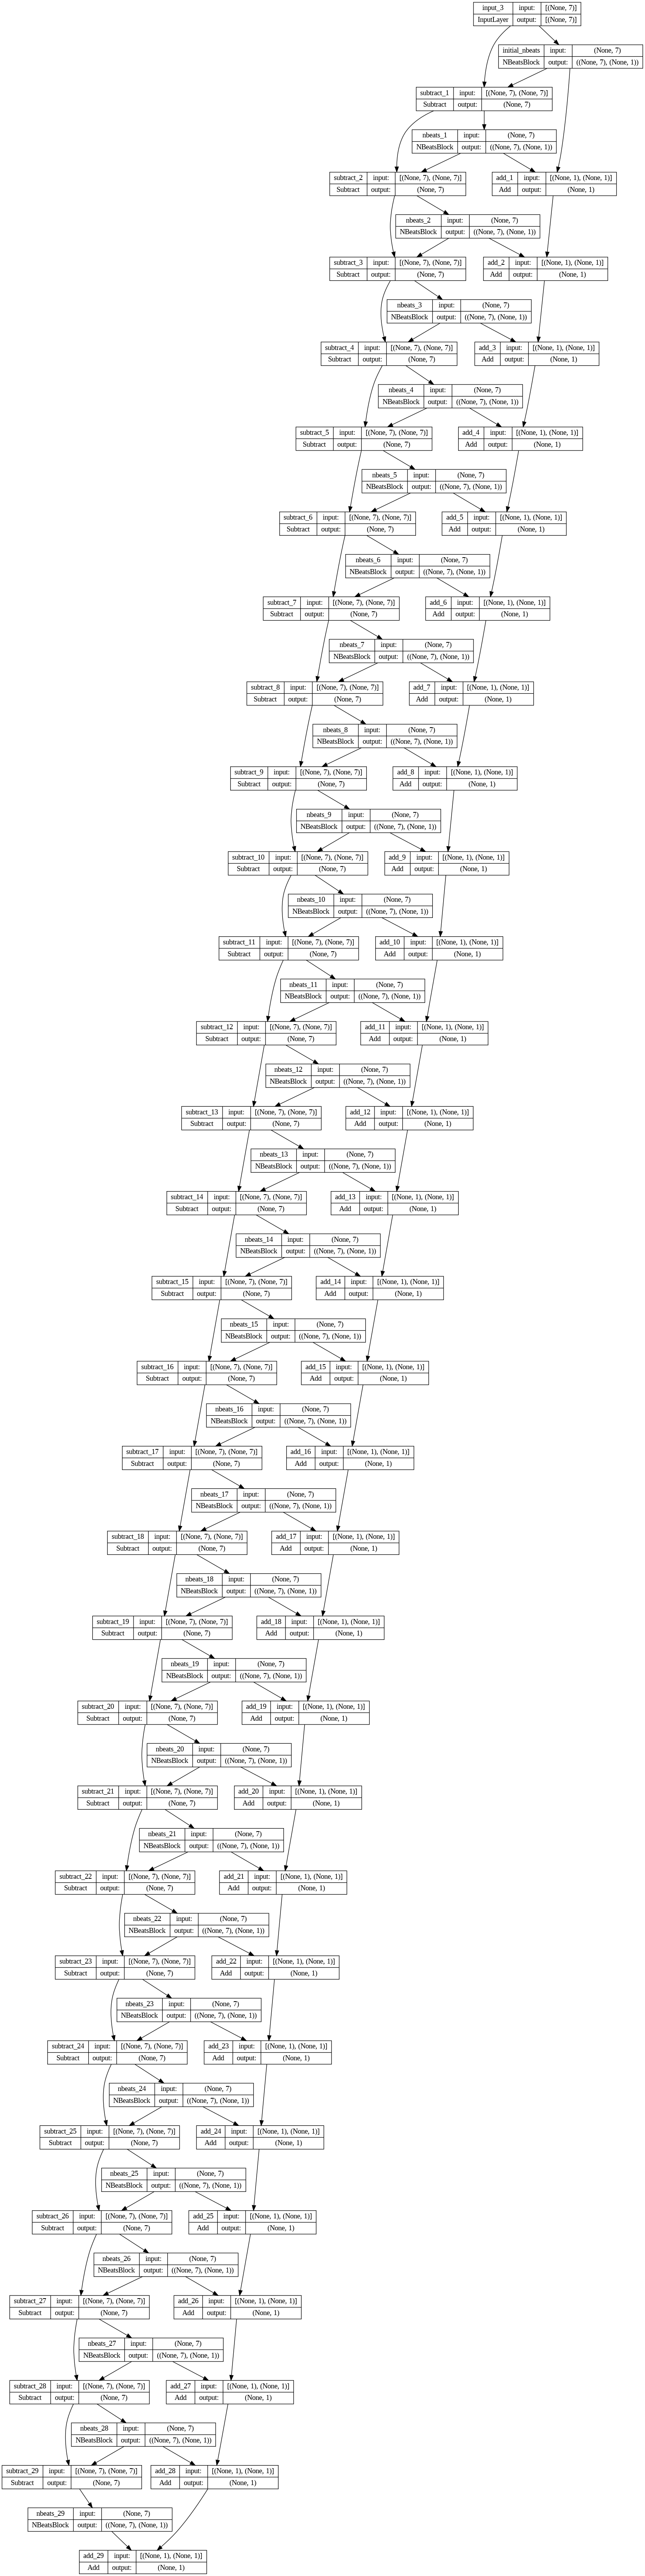

In [143]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True)

In [144]:
N_EPOCHS

5000

In [145]:
# create call_backs

early_call_backs = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=200, restore_best_weights=True, )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience=100, factor=0.1)

In [146]:
history = resnet_model.fit(train_ds, epochs=N_EPOCHS, validation_data=test_ds, verbose=0, callbacks=[early_call_backs, reduce_lr])

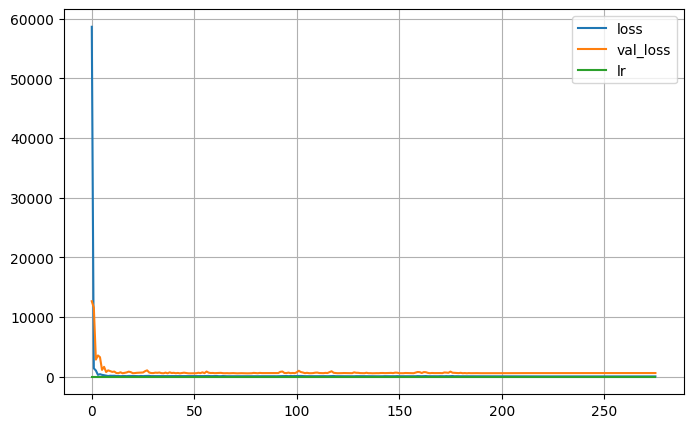

In [147]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [148]:
resnet_model.evaluate(test_ds)

1/1 [==============================] - 0s 101ms/step - loss: 572.7840


572.7839965820312

In [149]:
predictions = resnet_model.predict(test_ds)


1/1 [==============================] - 1s 1s/step


In [150]:
predictions = tf.squeeze(predictions)

In [151]:
predictions = tf.cast(predictions, dtype=tf.float64)


In [152]:
resnet_results = evaluate_preds(y_true=test[WINDOW_SIZE:],
                                 y_pred=predictions)

In [153]:
resnet_results


{'mae': 572.7839853654109,
 'mse': 1167548.0538054719,
 'rmse': 1080.5313756691528,
 'mape': 2.620204881969037,
 'mase': 0.99970834712965}

In [154]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Ensemble model

In [192]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_ds,
                        test_data=test_ds,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  ensemble_models = []
  for i in range(num_iter):
    print(f"Iteration: {i+1}")
    for loss in loss_fns:
      print(f"Loss: {loss}")
      # create a new model
      model = tf.keras.models.Sequential([
          tf.keras.layers.Input(shape=(WINDOW_SIZE)),
          tf.keras.layers.Dense(128, kernel_initializer ='he_normal', activation="relu"),
          tf.keras.layers.Dense(128, kernel_initializer ='he_normal', activation="relu"),
          tf.keras.layers.Dense(HORIZON)
      ])
      model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])
      # fit the model
      model.fit(train_data,
                epochs=num_epochs,
                validation_data=test_data,
                verbose=0,
                callbacks =
                 [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 200, restore_best_weights=True),
                  tf.keras.callbacks.ReduceLROnPlateau('val_loss', patience=100, verbose = 1)])
      ensemble_models.append(model)

  return ensemble_models

In [193]:
ensemble_models = get_ensemble_models(horizon=HORIZON,
                                      train_data=train_ds,
                                      test_data=test_ds,
                                      num_iter=5,
                                      num_epochs= 1000,
                                      loss_fns=["mae", "mse", "mape"])


Iteration: 1
Loss: mae

Epoch 143: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 243: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Loss: mse

Epoch 239: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 350: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 450: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Loss: mape

Epoch 289: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Iteration: 2
Loss: mae

Epoch 375: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 475: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Loss: mse

Epoch 591: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 691: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Loss: mape

Epoch 321: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Iteration: 3
Loss: mae

Epoch 47

In [194]:
ensemble_models

In [195]:
def make_esemble_preds(ensemble_models, data):
  preds = []
  for model in ensemble_models:
    preds.append(model.predict(data))
  return tf.squeeze(preds)



In [196]:
%%time
esemble_preds = make_esemble_preds(ensemble_models, test_ds)


1/1 [==============================] - 0s 246ms/step
CPU times: user 3.59 s, sys: 216 ms, total: 3.81 s
Wall time: 7.93 s


In [197]:
mean_preds = tf.reduce_mean(esemble_preds, axis=0)
mean_preds

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 8721.042 ,  8633.535 ,  8490.488 ,  8429.107 ,  8513.71  ,
        8193.929 ,  8078.664 ,  8038.855 ,  7598.4736,  7255.299 ,
        7269.454 ,  7058.008 ,  7201.3296,  7116.331 ,  7486.331 ,
        7426.942 ,  7719.7754,  7595.873 ,  7378.0522,  7333.7134,
        7281.7134,  7203.298 ,  7371.2217,  7507.9263,  7543.8335,
        7563.6777,  7333.5156,  7219.603 ,  7173.0933,  7165.1016,
        7223.6987,  7073.915 ,  7089.511 ,  6868.7554,  6553.1816,
        7377.6743,  7187.2217,  7156.945 ,  7295.5444,  7231.4863,
        7212.297 ,  7214.063 ,  7207.5425,  7181.6895,  7216.6494,
        7304.124 ,  7392.7285,  7260.62  ,  7167.8384,  7158.1274,
        6939.1987,  7262.4087,  7342.8647,  7356.0547,  7729.6567,
        8060.4844,  8153.0605,  7865.27  ,  8086.647 ,  8111.2754,
        8164.963 ,  8130.072 ,  8715.125 ,  8918.338 ,  8770.478 ,
        8959.669 ,  8961.84  ,  8681.166 ,  8627.568 ,  8680.683 ,
        8626.8

In [198]:
median_preds = np.median(esemble_preds, axis=0)
median_preds

array([ 8735.73  ,  8625.181 ,  8491.814 ,  8438.619 ,  8512.017 ,
        8197.691 ,  8085.782 ,  8048.203 ,  7598.5415,  7256.9946,
        7284.203 ,  7057.5693,  7205.6226,  7123.3164,  7494.218 ,
        7421.0933,  7726.7227,  7592.09  ,  7378.8857,  7333.896 ,
        7285.5527,  7207.1445,  7378.099 ,  7509.1367,  7544.4507,
        7562.8394,  7345.4062,  7218.6836,  7175.6094,  7165.461 ,
        7224.2524,  7077.6323,  7090.505 ,  6868.2036,  6553.388 ,
        7375.155 ,  7184.1787,  7147.0474,  7281.469 ,  7246.405 ,
        7204.5337,  7214.7983,  7212.975 ,  7178.983 ,  7218.0913,
        7306.5146,  7395.5366,  7265.1353,  7167.9165,  7154.8096,
        6935.7183,  7259.849 ,  7341.345 ,  7356.719 ,  7731.6675,
        8065.8413,  8161.3286,  7859.188 ,  8086.7197,  8111.355 ,
        8169.681 ,  8126.1196,  8720.594 ,  8919.509 ,  8765.403 ,
        8956.373 ,  8969.041 ,  8683.668 ,  8624.8955,  8683.989 ,
        8628.095 ,  8370.162 ,  8416.47  ,  8329.179 ,  8533.8

In [199]:
y_true=tf.cast(test[WINDOW_SIZE:], tf.float32)


In [200]:
mean_results = evaluate_preds(y_true, y_pred=mean_preds)
mean_results


{'mae': 569.0661,
 'mse': 1148934.1,
 'rmse': 1071.8834,
 'mape': 2.5687532,
 'mase': 0.99321944}

In [201]:
median_results = evaluate_preds(y_true, y_pred=median_preds)
median_results


{'mae': 568.99347,
 'mse': 1151874.0,
 'rmse': 1073.2539,
 'mape': 2.5572228,
 'mase': 0.99309266}

In [202]:
model1_result

{'mae': 563.1126,
 'mse': 1156548.5,
 'rmse': 1075.4294,
 'mape': 2.5222232,
 'mase': 0.9892329}